In [65]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, decomposition, datasets, metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

In [9]:
public_data = pd.read_csv('data_public.csv.gz')

#X = pd.DataFrame(data=,
 #                columns=['_'.join(feature_name.split()[:2]) for feature_name in iris_data.feature_names])
#y = pd.DataFrame(data=iris_data.target,
#                 columns=['species'])


In [12]:
public_data.shape

(1200000, 16)

In [13]:
public_data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.166636e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.872945e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


In [14]:
public_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,3
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,2
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,3
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [15]:
X_train, X_test, y_train, y_test = train_test_split(public_data.drop(columns="Class"),
                                                   public_data["Class"],
                                                 test_size=0.3)


In [16]:
pub_train = pd.concat([X_train,
                        y_train],
                       axis=1)
pub_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
346365,-65.327553,-38.686087,-45.964970,-106.796541,-9.643728,-133.311830,-52.162416,-6.698575,46.757194,-95.764739,42.907672,-36.899539,-60.958680,27.474676,60.135046,1
438862,-31.159715,-15.237480,4.806627,20.284250,-23.499433,-26.576498,6.953883,-23.027116,-7.499739,20.585792,4.229739,3.888329,-60.570863,-8.723062,3.278222,2
1185080,-33.646614,-9.942044,12.739356,18.785580,-18.590629,-22.896025,-4.393182,-26.826079,-8.783697,29.733914,5.171090,7.090810,-56.826102,-9.651665,2.941146,2
162715,-36.683672,-15.763946,7.421681,18.785184,-21.174810,-24.197854,-1.147740,-25.656734,-9.517577,26.686105,3.352120,2.951818,-57.391646,-1.804009,-2.241645,2
1125721,-35.745472,-19.452968,13.665444,19.475835,-22.897901,-30.516181,6.982681,-27.707641,-7.524594,28.301393,2.073853,2.645162,-60.137594,-3.935963,5.626308,2


In [17]:
pub_train.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000
mean,50.667380,-18.842500,71.605568,-13.556927,29.435773,-6.197713,31.726042,51.113133,33.001371,40.912409,79.376080,-6.747079,-42.323962,49.478769,59.794934,2.166502
std,129.240752,14.466274,105.273164,46.906558,72.823250,73.086577,66.599046,103.401712,42.170657,76.946741,94.829866,15.582230,17.918013,67.276771,66.772588,0.687322
min,-73.089401,-83.223570,-59.728535,-137.581849,-38.298257,-148.373954,-65.018947,-42.460894,-18.185416,-112.384444,-14.152332,-60.916901,-81.449877,-20.309609,-12.830594,1.000000
25%,-37.934828,-17.874765,7.560258,-14.712325,-24.360143,-30.723559,-3.489071,-26.292602,-7.592121,21.074136,2.426198,-8.879909,-55.677972,-7.133370,0.159660,2.000000
50%,-31.975759,-13.703336,13.488006,-7.949342,-18.971477,-24.746992,1.482912,-18.163146,37.712758,27.176343,26.337297,-1.077513,-52.976959,14.500241,46.867831,2.000000
75%,227.995486,-10.562529,212.328668,19.562825,128.908386,78.334031,115.181866,191.581710,79.857429,125.384428,204.645673,3.340634,-22.069488,136.347913,145.122349,3.000000
max,267.557271,4.460108,256.169843,32.637993,154.670901,122.918640,163.432609,232.949604,110.804605,171.797752,259.800312,21.594956,10.328284,178.930350,174.992017,3.000000


In [18]:
pub_test = pd.concat([X_test,
                       y_test],
                      axis=1)
pub_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
688053,-35.081854,-10.559112,17.575460,16.387965,-25.116514,-31.010513,0.579284,-28.562546,-6.813536,25.547442,-3.137456,5.504157,-54.472437,-10.350607,-0.430600,2
1126329,-36.719123,-12.617577,12.907522,22.351798,-21.201080,-27.497906,-4.202549,-23.358591,-9.030813,22.757337,2.454878,7.964533,-57.850963,-5.401201,1.525017,2
1042029,-59.362035,-51.567479,-43.909206,-118.407007,-23.327867,-124.157585,-56.577528,-4.563146,60.905514,-87.829663,51.155964,-44.717220,-55.447244,37.373664,62.289481,1
389697,-28.185512,-7.309242,14.516516,18.331489,-20.742016,-25.852716,0.559613,-26.233759,-12.628069,19.304510,0.592293,1.722973,-51.743990,-6.091599,1.553553,2
240017,-33.444461,-14.504649,9.298872,19.998418,-29.956352,-20.794873,-2.734018,-21.435628,-8.241728,22.142777,7.275517,0.324339,-56.127922,-8.443342,7.217164,2


In [19]:
pub_test.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,50.731315,-18.813255,71.658743,-13.537849,29.455778,-6.155968,31.778782,51.152815,32.999373,40.955899,79.400479,-6.745283,-42.320419,49.516619,59.822929,2.166947
std,129.269226,14.457176,105.298697,46.877212,72.821770,73.101425,66.613268,103.413749,42.172485,76.937234,94.863880,15.557788,17.896043,67.295332,66.787779,0.687232
min,-71.291516,-75.515266,-58.621708,-137.490156,-38.026083,-148.591728,-66.541371,-41.459135,-17.516909,-111.330003,-12.584160,-62.718276,-80.908105,-20.579791,-12.762138,1.000000
25%,-37.941125,-17.848541,7.539248,-14.715920,-24.367952,-30.727725,-3.471931,-26.306108,-7.602087,21.094552,2.403789,-8.861424,-55.663249,-7.128047,0.169848,2.000000
50%,-31.985277,-13.686961,13.487529,-8.069213,-18.967987,-24.770546,1.509337,-18.178618,37.635346,27.169379,26.995866,-1.082007,-52.972667,14.898540,47.003138,2.000000
75%,228.016300,-10.541699,212.371546,19.545749,128.886144,78.370846,115.187696,191.607169,79.823944,125.385845,204.646083,3.321133,-22.118310,136.386617,145.145421,3.000000
max,268.773840,4.367902,252.044192,32.223447,157.984260,119.597416,166.053416,230.351271,111.297012,175.539703,257.356521,20.122918,8.633826,177.758080,180.701133,3.000000


Text(0, 0.5, 'explained_variance_')

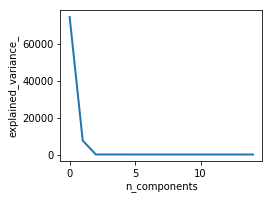

In [34]:
#https://scikit-learn.org/0.18/auto_examples/plot_digits_pipe.html
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [59]:
'''sepal_features = [0,1]
petal_features = [2,3]

sepal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='mean')),
    ('scaler',
     StandardScaler())
])

petal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='median')),
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('sepal',
     sepal_transformer,
     sepal_features),
    ('petal',
     petal_transformer,
     petal_features)
])
'''
preprocessor = decomposition.PCA(n_components=5)
classifier = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)

In [60]:
pipeline = Pipeline(steps=[
    ('precprocessor',
     preprocessor),
    ('classifier',
     classifier)
])


In [61]:
#Grid search for parameters for RandomForest and PCA
n_components = [2, 5, 10]
#Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipeline,dict(precprocessor__n_components=n_components))
#print(estimator.get_params().keys())
estimator.fit(X_train, y_train)

/home/mahmoud/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('precprocessor', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None...imators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [78]:
predicted = pipeline.predict(X_test)
print(metrics.classification_report(y_test,
                                    predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59978
           2       1.00      1.00      1.00    179943
           3       1.00      1.00      1.00    120079

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000



In [79]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
predicted = classifier.predict(X_test)
print("Metrics with random forest")
print(metrics.classification_report(y_test,
                                    predicted))

Metrics with random forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59978
           2       1.00      1.00      1.00    179943
           3       1.00      1.00      1.00    120079

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000



In [83]:
predicted = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 2, min_samples_split = 5).fit(X_train,y_train).predict(X_test)
print(metrics.classification_report(y_test,
                                    predicted))
print(metrics.confusion_matrix(y_test,
                               predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59978
           2       1.00      1.00      1.00    179943
           3       1.00      1.00      1.00    120079

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000

[[ 59978      0      0]
 [     0 179943      0]
 [     0      0 120079]]


In [8]:
input_types = dict([(x, FloatTensorType([1, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_iris_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("iris_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

The maximum opset needed by this model is only 1.


In [9]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("iris_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 0 1 0 1 2 0 1 0 2 1 0 1 0 0 1 2 0 2 1 2 1 2 0 2 2 0 1 0 2 0 0 2 1 1 2 0
 0 1 0 2 0 2 1 2]


(-0.5, 2493.5, 5022.5, -0.5)

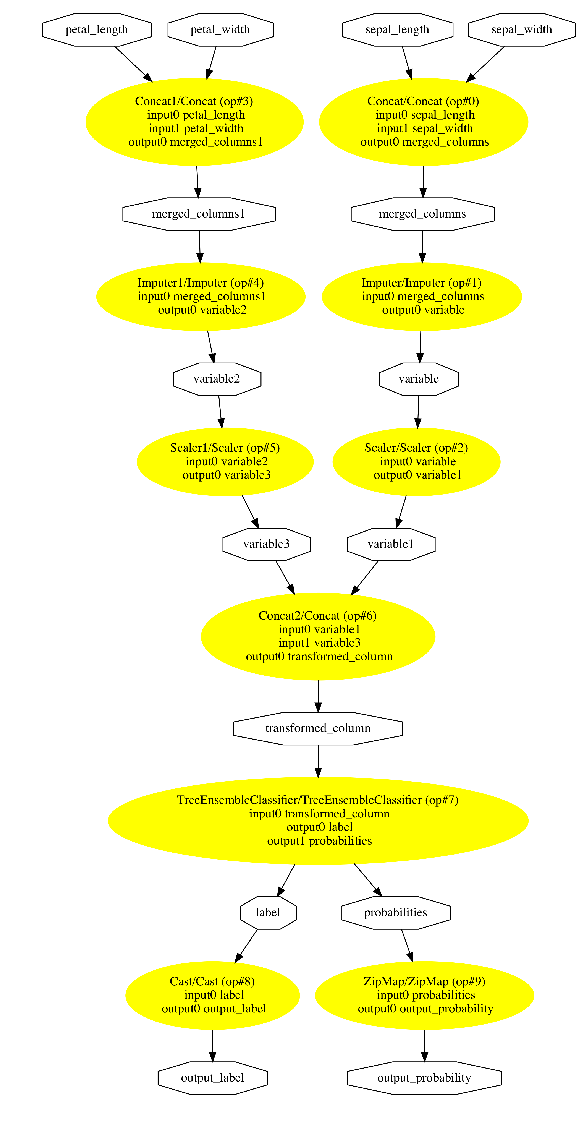

In [10]:
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))
pydot_graph.write_dot("iris_pipeline.dot")

os.system('dot -O -Gdpi=300 -Tpng iris_pipeline.dot')

image = plt.imread("iris_pipeline.dot.png")
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(image)
ax.axis('off')